DANIEL FLORES RODRÍGUEZ - A01734184

In [ ]:
# Se instala los paquetes y librerias necesarias para poder realizar el analizis de la situacion problema, utilizamos matplotlib para poder graficar
# y visualisar nuestros dacumentos 
!pip install matplotlib
# se usa pandas para el manejo y vizualizacion de datos de matrices
!pip install pandas
#usada para poder leer los dataframes
!pip install pandas_datareader
# para poder visualizar datos de manera resumida.
!pip install dataprep

#importamos librerias
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np




#importamos nuestro archivo csv
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/Shareddrives/Reto AI SEPTIMO"

In [3]:
# importamos archivo csv de nombres de las firmas que contienen las firmas, con informacion relevante de cada una de estas.
data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1 # se imprime el dataset, para ver si es el correcto

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


In [4]:
# En esta seccion se lee el otro archivo csv, donde podremos obtener, el nombre de las formas, el ticker y el sector al que 
# pertenece la firma correspondiente
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\nlevel 1"]] #definimos las colunas que se usaran para armar el nuevo dataframe
df2 # de igual manera imprimimos el dataset

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [5]:
# a traves de la función merge, juntamos estos dos datasets separados anteriormente
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")

# al tener mergeado ambos datasets, se procede a dropear filas que contengan valores nulos, y la columna de Ticker, ya que esta solo fue usada 
# .. para poder usarla de indice para mergear los datasets

#cabe mencionar que solo se realiza a las columnas más importantes del dataset
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df #imprimimos el data set para visualizar como quedó

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [6]:
#calculamos las nuevas columnas, a traves de la funcion assign y a traves de formulas proporcionadas en clase:

# Market Value = (originalprice * sharesoutstanding)
df = df.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)
df = df.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfF y para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


In [7]:
# en este paso, se agrupa el dataset de acuerdo con la firma, con esto,se vuelve a asignar a la variable df, para que se quedé de dicha manera.
df = [y for _, y in df.groupby('firm', as_index=False)]

In [8]:
# calculamos lprice, r, r2, operating proffit, ebit y operating profit margin
for i in range(len(df)):
  df[i]['lprice'] = df[i].groupby(['firm'])['adjprice'].shift(4)
  df[i]['r'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i]['lprice'].astype(np.float))
  df[i]['r2'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i].groupby(['firm'])['adjprice'].shift(4).astype(np.float))
  df[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
  #profit margin measures
  df[i]['operating_profit'] = (df[i]['revenue'].astype(np.float) - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float))
  df[i]['ebit'] = (df[i]['revenue'].astype(np.float)  - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float)  - df[i]['otheropexp'].astype(np.float))
  df[i]['operating_profit_margin'] = (df[i]['ebit'].astype(np.float)  / df[i]['revenue'].astype(np.float) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWar

In [11]:
# en esta sección de codigo, lo que se esta realizando es una limpieza final de los datos, y se realiza la suma de 
# ..los cuartiles, de algunas de las variables.


for i in range(len(df)):

  # en esta parte, se cambian los tipos de valores de strings a numeros flotantes 
  df[i]['revenue'] = df[i]['revenue'].astype(np.float)
  df[i]['cogs'] = df[i]['cogs'].astype(np.float)
  df[i]['sgae'] = df[i]['sgae'].astype(np.float)
  df[i]['otheropexp'] = df[i]['otheropexp'].astype(np.float)
  df[i]['extraincome'] = df[i]['extraincome'].astype(np.float)
  df[i]['finexp'] = df[i]['finexp'].astype(np.float)

  df_Final4 = df[i].tail(4) #debido a que tenemos que sumar los cuatrimestres, se realiza un tail(4), lo cual nos permite almacenar estos ultimos 4 cuatrimestres

  #dejamos a un lado todas las variables que no queremos sumar
  temp = df[i].tail(1)

  total_assets = list(temp['totalassets'])[0]
  total_liabilities = list(temp['totalliabilities'])[0]
  short_debt = list(temp['shortdebt'])[0]
  long_debt = list(temp['longdebt'])[0]
  stockholder_equity = list(temp['stockholderequity'])[0]
  adj_price = list(temp['adjprice'])[0]
  original_price = list(temp['originalprice'])[0]
  book_value = list(temp['book_value'])[0]
  market_value = list(temp['market_value'])[0]
  operating_profit = list(temp['operating_profit'])[0]
  ebit = list(temp['ebit'])[0]
  #operating_profit_margin = list(temp['operating_profit_margin'])[0]
  sharesout_standing = list(temp['sharesoutstanding'])[0]
  naics = list(temp['Sector NAICS\nlevel 1'])[0]
  name = list(temp['Name'])[0]
  newDF = df_Final4.groupby('firm', as_index = False).agg({'revenue':'sum','cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum'})

  #reasignamos variables en un nuevo dataset llamado newDF
  newDF['totalassets'] = total_assets
  newDF['totalliabilities'] = total_liabilities
  newDF['shortdebt'] = short_debt
  newDF['longdebt'] = long_debt
  newDF['stockholderequity'] = stockholder_equity
  newDF['adjprice'] = adj_price
  newDF['originalprice'] = original_price
  newDF['sharesoutstanding'] = sharesout_standing
  newDF['book_value'] = book_value
  newDF['market_value'] = market_value
  newDF['operating_profit'] = operating_profit
  #newDF['operating_profit_margin'] = operating_profit_margin
  newDF['ebit'] = ebit
  newDF['Sector NAICS\nlevel 1'] = naics
  newDF['Name'] = name

  #asignamos las nuevas filas a df (dataframe)
  df[i] = newDF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.flo

In [12]:
#se declara un nuevo dataframe, y se asigna los resultados obtenidos de la seccion de arriba a este.
mergedDF = pd.DataFrame()

for i in df:
  mergedDF = mergedDF.append(i, ignore_index = True)


mergedDF #imprimimos el nuevo adataframe, con datos actualizados.

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,45.48795638,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


DEBIDO A QUE OPERATING PROFIT MARGIN ES UN PROMEDIO PONDERADO, SE REALIZA SU OPERACION,DESPUES DE HABER SUAMADO LOS VALORES Y TRAS HABER HECHO EL MERGE.

In [39]:
mergedDF = mergedDF.assign(operating_profit_margin=lambda x: x.ebit.astype(np.float) / x.revenue.astype(np.float))

mergedDF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,0.055156,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,45.48795638,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,0.054684,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,0.142081,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,0.024977,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-0.010830,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-0.094083,-1.474300e+04,Manufacturing,Zevia Pbc
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-0.003657,-8.410000e+02,Educational Services,Zovio Inc
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,0.157214,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-7.300701,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


# 2.1 General questions
* By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?
* R: POR CADA INDUSTRIA, PODEMOS DECIR QUE LA COMPOSICION DE CADA FIRMA PUBLICA DE ESTADOS UNIDOS EN TERMINOS DEL TAMAÑO DE LA FIRMA, DEL DESEMPEÑO Y LAS GANANCIAS SE BASA PRINCIPALMENTE EN QUE TANTA GANANCIA Y QUE TANTO IMPACTA EN EL MERCADO EN DONDE DESEMPEÑA LAS ACTIVIDADES DICHA FIRMA, PARA ESTO, MUCHAS EMPRESAS NECESITAN ESTUDIAR EL ENTORNO EN DONDE SE ENCUENTRAN EN TERMINOS DE TIEMPO Y VARAIBLES DE LA MISMA LOCACION. ES POR ESTO QUE SE USAN HERRAMIENTAS COMO LO ES LA ESTADISTICA Y LA COMPUTACION PARA ANALIZAR TODAS ESTAS VARIABLES Y ASI, JUNTO CON LA COMPUTACION, PODER ANALIZAR A FUTURO Y DETENIDAMENTE, A TRAVES DE INFORMACIÓN HISTORICA, EL DESEMPEÑO DE LAS MISMAS FIRMAS.

* Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

* R: LA RESPUESTA A ESTO, PODEMOS DECIR QUE RESIDE EN QUE TAN BIEN SE ADMINISTRAN LOS RECURSOS Y FONDOS PARA PODER LOGRAR UN DESEMPEÑO MAYOR. A ESTO PODEMOS MENCIONAR QUE LAS PRINCIPALES VARIABLES IMPORTANTES RELACIONADAS AL LAS STOCK RETURNS SON EL MARKET VALUE Y EL BOOKED VALUE OF THE FIRM, LAS CUALES SE CALCULAN SIGUIENDO LAS SIGUIENTES FORMULAS: 
Market Value = (originalprice * sharesoutstanding) Y 
Book Value of the firm = (totalassets-totalliabilities)



#2.2.1.1 Considering the most recent financial quarter

* **Show how many firms by industry there are in the sample**

In [40]:
#agrupamos de acuerdo al sector de las firmas y observamos cuantas existen en nuestro conjunto de datos.
mergedDF.groupby('Sector NAICS\nlevel 1')["firm"].nunique()

Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 


*   **For each industry (and for all industries)**
*   **What can you say about the typical firm size in terms of market value and book value?**
* R: PODEMOS DECIR QUE EL MARKET VALUE ES SIEMPRE MAYOR QUE EL BOOK VALUE, ESTO CORRESPONDE A QUE EL PRIMERO SIEMPRE TIENDE A SER MAYOR QUE EL SEGUNDO ALGO QUE ES NORMAL YA QUE EN ESTE CASO EL MARKET VALUE CAPTURA LA GANANCIA Y EL CRECIMIENTO FUTURO. SIENDO ESTO, LOGICAMENTE ALTERADO, DEPENDIENDO DE LAS VARIABLES QUE CONFORMAN EL VALOR DE CADA INDUSTRIA. SI BIEN PODEMOS OBSERVAR EN LA DESCRIPCION DEL MARKET VALUE EN TERMINOS DE CADA FIRMA, LAS MAS GRANDES FIRMAS EN TERMINOS DE MARKET VALUE PERTENECEN AL SECTOR TECNOLOGICO Y DE INFORMACION, SIENDO APPLE LA EMPRESA CON MAYOR MARKET VALUE, CON CASI 2,210,000,000 USD, SEGUIDO DE MICROSOFT Y GOOGLE, PODEMOS DECIR GRANCIAS A ESTO QUE ESTE SECTOR, ES Y HA SIDO RELEVANTE PARA TODAS LAS ACTIVIDADES ECONOMCAS EN LOS ULTIMOS AÑOS.
*   **How much these variables change within each industry?**
* R: TODAS LAS VARIABLES DIFIEREN Y SE COMPORTAN DE MANERA DISTINTA, DEPENDIENDO DE QUE INDUSTRIA ESTEMOS HABLANDO, PODREMOS CONSIDERAR ESTO COMO ALGO NORMAL, PUES CADA INDUSTRIA TIENE PUEDE TENER MAS ACTIVIDAD O GENERAR MAS INGRESOS, DEPENDIENDO DE DIFERENTES VARIABLES EN EL ENTORNO ECONOMICO EN EL QUE SE DESENVUELVEN, TAL Y COMO PODEMOS OBSERVAR EN LA TABLA DEL MARKET VALUE, LAS PRIMRERAS 3 INDUSTRIAS QUE TIENEN UN MAYOR MARKET VALUE, SON RETAIL TRADE, INFORMATION Y Professional, Scientific, and Technical Services, SECTORES FUERTES EN TERMINOS ACTUALES, SIN EMBARGO, COMO PODEMOS OBSERVAR, EXISTEN OTROS QUE NO SON TAN GRANDES O SIMPLEMENTE YA CASI NO TIENEN RELEVANCIA EN EL MERCADO, SIN EMBARGO, HAY SERCTORES QUE POR LA NATURALEZA DE SU GIRO, EN TERMINOS DE BOOK VALUE, PUEDES LLEGAR A SUPERAR A LAS EMPRESAS MAS FUERTES EN TERMINOS DE MARKET VALUE. EN ESTE CASO, PODEMOS OBSERVAR QUE EL BOOK VALUE QUE SOBRESALE DE TODAS LAS OTROS SECTORES ES EL DE FINANCE AND INSURANCE. SIN EMBARGO AL REVISAR EL DESCRIBE DE TODOS LOS BOOK VALUES, PODEMOS CONCLUIR QUE AQUEL SECTOR CON EL MAYOR VALOR ES UTILITIES, POR CASI 7.48E+06 USD.
*   **How firm size (in market value) is distributed?**
* R: PODEMOS OBSERVAR, POR LAS GRAFICA DE CAJA DE LA PARTE DE ABAJO, QUE LOS TAMAÑOS DE CADA FIRMA ESTAN DISTRIBUIDOS DE MANERA DIFERENTE, Y QUE CADA UNA DE ESTAS TIENE DIFERENTES VALORES QUE EN TERMINOS DEL MARKET VALUE, TODAS RONDAN ENTRE 0 Y 0.5, SIN EMBARGO EXISTEN OTRAS FIRMAS QUE LLEGAN A REBASAR 2.0 EN LA GRAFICA DE BOX, TIENE SENTIDO, YA QUE CON ESTE VALOR, ES COMO DEFINIREMOS EN UN FUTURO LOS TAMAÑOS DE LAS FIRMAS, YA SEA SMALL, MEDIUM O BIG.


In [ ]:
!pip install seaborn
import seaborn as sns

In [14]:
# Revision de nombre de las columnas para los siguientes comandos
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

In [17]:
# Datos del Market Value de Cada Firma
mergedDF.groupby('firm')['market_value'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
APA,1.0,3.490000e+01,NaN,3.490000e+01,3.490000e+01,3.490000e+01,3.490000e+01,3.490000e+01
THMO,1.0,3.539763e+03,NaN,3.539763e+03,3.539763e+03,3.539763e+03,3.539763e+03,3.539763e+03
CTIB,1.0,4.225713e+03,NaN,4.225713e+03,4.225713e+03,4.225713e+03,4.225713e+03,4.225713e+03
FWBI,1.0,4.327068e+03,NaN,4.327068e+03,4.327068e+03,4.327068e+03,4.327068e+03,4.327068e+03
VLON,1.0,4.358171e+03,NaN,4.358171e+03,4.358171e+03,4.358171e+03,4.358171e+03,4.358171e+03
...,...,...,...,...,...,...,...,...
TSLA,1.0,6.976698e+08,NaN,6.976698e+08,6.976698e+08,6.976698e+08,6.976698e+08,6.976698e+08
AMZN,1.0,1.080624e+09,NaN,1.080624e+09,1.080624e+09,1.080624e+09,1.080624e+09,1.080624e+09
GOOGL,1.0,1.435042e+09,NaN,1.435042e+09,1.435042e+09,1.435042e+09,1.435042e+09,1.435042e+09


In [18]:
# Datos del Market Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['market_value'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Other Services (except Public Administration),16.0,2.145581e+06,2.934968e+06,2.875930e+04,1.955103e+05,8.540956e+05,3.250765e+06,1.097183e+07
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,1.015306e+04,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07
Real Estate and Rental and Leasing,67.0,3.680102e+06,1.027568e+07,1.330728e+04,2.244812e+05,8.831111e+05,2.474306e+06,7.776567e+07
Construction,45.0,3.859302e+06,5.645182e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Wholesale Trade,79.0,4.847166e+06,8.621418e+06,8.372651e+03,2.329474e+05,1.424602e+06,5.386258e+06,4.741962e+07
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
"Mining, Quarrying, and Oil and Gas Extraction",103.0,6.789641e+06,1.362057e+07,3.490000e+01,1.542948e+05,1.042405e+06,4.686079e+06,6.468620e+07
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07


EN ESTE CASO, SE PLOTEARÁ LA VIZUALIZACION DEL MARKET VALUE A TRAVES DE UNA GRAFICA DE CAJAS, SECCIONADO POR SECTORES, ESTO SE HACE DEVIDO A QUE LA CANTIDAD DE DATOS EN EL EJE X SERÍA MAS GRANDE SI SE PLOTEARA USANDO FIRMAS Y SERIA DIFICIL VISUALIZAR LOS RESULTADOS.
SE PUEDE NOTAR QUE MANUFACTURING, ES EL SECTOR QUE MÁS DESTACA, TENIENDO SENTIDO, PUES ES LA QUE MAS FIRMAS ABARCA.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

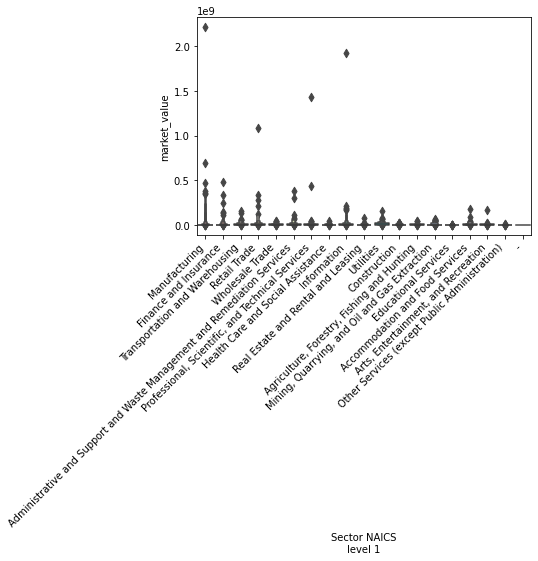

In [22]:
#Market Value graficación por sector, se usa una box plot
sns.boxenplot(x='Sector NAICS\nlevel 1', y='market_value', data=mergedDF)

plt.xticks(rotation = 45, ha = "right")

In [23]:
# Datos del Book Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['book_value'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,69.0,5.019647e+05,2.440004e+06,-8658900.0,1.072699e+04,231685.0,954019.00,7289000.0
Other Services (except Public Administration),16.0,5.288942e+05,7.042536e+05,-456108.0,6.714814e+04,172889.0,752973.50,1904011.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.0,966118.00,4322243.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,444065.5,1161768.25,10400700.0
Wholesale Trade,79.0,1.480367e+06,2.841232e+06,-4180309.0,1.661030e+05,683900.0,1774492.50,20582000.0
Real Estate and Rental and Leasing,67.0,1.761279e+06,3.043750e+06,-649000.0,1.755655e+05,578033.0,2083457.00,19075974.0
Manufacturing,1533.0,2.307380e+06,9.572149e+06,-14791000.0,4.616543e+04,229985.0,903600.00,184508000.0
Construction,45.0,2.483906e+06,4.236454e+06,83162.0,4.073750e+05,963495.0,2488619.00,21789774.0
Administrative and Support and Waste Management and Remediation Services,132.0,2.677850e+06,7.116921e+06,-1026446.0,8.216000e+04,525086.0,1871825.00,46515000.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

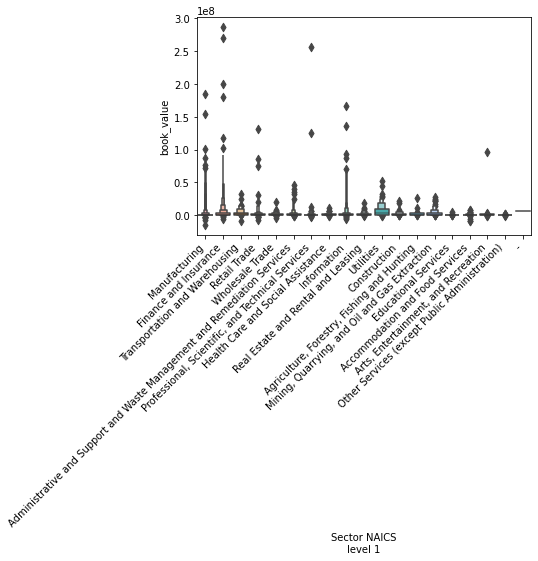

In [25]:
#Book Value graficacion por sector

sns.boxenplot(x='Sector NAICS\nlevel 1', y='book_value', data=mergedDF)

plt.xticks(rotation = 45, ha = "right")

*   **For each industry (and for all industries),**
*   **What can you say about profit margin of firms?**
* R: PODEMOS DECIR QUE LAS UNICAS DOS FIRMAS QUE TIENEN UNA MARGEN DE GANANCIA MAYOR A 1.0 SON "Accommodation and Food Services" Y "Construction" CON 6.9 Y 4.6 RESPECTIVAMENTE.
SE PODRIA DECIR QUE CON ESTA MEDIDA, LAS EMPRESAS PUEDEN ENTENDER LOS MARGENES DE BENEFICIOS QUE LLEGAN A TENER CADA FIRMA, PUES BASICAMENTE, VIENDO DE MANERA PERCENTUAL LA GANANCIA DE LAS MISMAS POR SUS VENTAS O SERVICIOS, ALGO INTERESANTE QUE PODEMOS OBSERVAR ES QUE NO TAODAS LAS FIRMAS SE ENCONTRABAN DENTRO DE UN RANGO POSITIVO, SIENDO INCLUSO QUE GRAN CANTIDAD DE ESTAS SE ENCONTRABAN EN UN RANGO NEGATIVO
* **show:**
*   **a) descriptive statistics of profit margin and**
*   **b) plot(s) to illustrate how profit margin changes across industries.**

In [41]:
# creamos un data set y le asignamos valores de mergedDF
MesuresDF = mergedDF[['firm', 'revenue', 'cogs', 'sgae', 'ebit']]
MesuresDF

,firm,revenue,cogs,sgae,ebit
0,A,6527000.0,3004000.0,2.056000e+06,3.600000e+05
1,AA,13386000.0,9653000.0,8.930000e+05,7.320000e+05
2,AAIC,31855.0,15523.0,0.000000e+00,4.526000e+03
3,AAL,40717000.0,0.0,4.160800e+07,1.017000e+06
4,AAME,195299.0,0.0,1.915230e+05,-2.115000e+03
...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,-1.474300e+04
3555,ZVO,230001.0,149303.0,1.118000e+05,-8.410000e+02
3556,ZWS,340300.0,195100.0,1.196000e+05,5.350000e+04
3557,ZY,14546.0,48949.0,2.327660e+05,-1.061960e+05


In [42]:
#creamos un dataset de profits que contiene firm, operating_profit y operating_profit_margin
ProfitdDF = mergedDF[['firm', 'operating_profit', 'operating_profit_margin']]
ProfitdDF

,firm,operating_profit,operating_profit_margin
0,A,3.600000e+05,0.055156
1,AA,6.570000e+05,0.054684
2,AAIC,4.526000e+03,0.142081
3,AAL,1.017000e+06,0.024977
4,AAME,-2.115000e+03,-0.010830
...,...,...,...
3554,ZVIA,-6.700000e+03,-0.094083
3555,ZVO,-9.723000e+03,-0.003657
3556,ZWS,5.380000e+04,0.157214
3557,ZY,-6.573600e+04,-7.300701


In [43]:
#describimos los mergedDF
mergedDF.groupby('firm')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.600000e+05,NaN,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05
AA,1.0,6.570000e+05,NaN,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05
AAIC,1.0,4.526000e+03,NaN,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03
AAL,1.0,1.017000e+06,NaN,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06
AAME,1.0,-2.115000e+03,NaN,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-6.700000e+03,NaN,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03
ZVO,1.0,-9.723000e+03,NaN,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03
ZWS,1.0,5.380000e+04,NaN,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04


In [44]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,126710.000000,NaN,126710.0,126710.000000,126710.000000,126710.00,126710.0
Accommodation and Food Services,69.0,235626.853177,6.324575e+05,-142000.0,5421.000000,38904.000000,157349.00,4004100.0
Administrative and Support and Waste Management and Remediation Services,132.0,163048.920693,4.942315e+05,-713000.0,95.500000,28169.000000,142138.50,4148000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,218999.116694,4.485638e+05,-18135.0,-1480.750000,19268.000000,160333.75,1616000.0
"Arts, Entertainment, and Recreation",21.0,206017.041144,5.320416e+05,-368756.0,4515.000000,54549.000000,178094.00,2390000.0
Construction,45.0,223408.468889,4.700429e+05,-90554.0,18727.000000,70000.000000,207221.00,2168200.0
Educational Services,14.0,14396.571429,5.877502e+04,-141260.0,371.000000,16561.500000,38039.50,126641.0
Finance and Insurance,697.0,262307.167099,1.119289e+06,-1315000.0,11680.000000,41290.000000,137300.00,15128000.0
Health Care and Social Assistance,64.0,72550.071519,3.089014e+05,-204471.0,-10986.250000,300.000000,62180.75,2264000.0


In [45]:
mergedDF.groupby('firm')['operating_profit_margin'].describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,0.055156,NaN,0.055156,0.055156,0.055156,0.055156,0.055156
AA,1.0,0.054684,NaN,0.054684,0.054684,0.054684,0.054684,0.054684
AAIC,1.0,0.142081,NaN,0.142081,0.142081,0.142081,0.142081,0.142081
AAL,1.0,0.024977,NaN,0.024977,0.024977,0.024977,0.024977,0.024977
AAME,1.0,-0.010830,NaN,-0.010830,-0.010830,-0.010830,-0.010830,-0.010830
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-0.094083,NaN,-0.094083,-0.094083,-0.094083,-0.094083,-0.094083
ZVO,1.0,-0.003657,NaN,-0.003657,-0.003657,-0.003657,-0.003657,-0.003657
ZWS,1.0,0.157214,NaN,0.157214,0.157214,0.157214,0.157214,0.157214


In [46]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.116434,NaN,0.116434,0.116434,0.116434,0.116434,0.116434
Accommodation and Food Services,69.0,0.026836,0.052608,-0.185496,0.006013,0.030179,0.052987,0.205075
Administrative and Support and Waste Management and Remediation Services,132.0,-0.228711,2.256826,-25.309333,-0.006001,0.017472,0.048322,0.456796
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.011563,0.094332,-0.325419,-0.018883,0.011591,0.028494,0.081257
"Arts, Entertainment, and Recreation",21.0,0.005289,0.158002,-0.489914,0.017141,0.029468,0.075602,0.219401
Construction,45.0,0.030784,0.041901,-0.067129,0.010090,0.030074,0.047405,0.223915
Educational Services,14.0,-0.001190,0.081691,-0.253790,0.001893,0.010315,0.029922,0.109233
Finance and Insurance,696.0,-inf,NaN,-inf,0.046634,0.156072,0.243971,0.604704
Health Care and Social Assistance,64.0,-inf,NaN,-inf,-0.107801,-0.009473,0.022602,0.073645


**Sample de los datos para poder observar de manera más limpia los datos**

OPERATING PROFIT SE CONSIDERA LA GANANCIA QUE TIENE CADA SECTOR EN CUESTION ECONOMICA Y ESTA SE MIDE EN USD, POR OTRO LADO EL OPERATING PROFIT MARGIN SE CONSIDERA EL MARGEN PORCENTUAL DE GANANCIA DE CADA SECTOR.
GRACIAS A LA GRAFICA DE ABAJO, PODEMOS VER QUE MANUFACTURING ES EL MAYOR SECTOR CON MAS OPERATOING PROFIT MARGIN, ES INTERESANTE NOTAR COMO LOS DEMAS SECOTORES SE MANTIENEN ENTRE 0 A 1000 USD, INCLUSO PODEMOS OBSERVAR VALORES NEGATIVOS.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

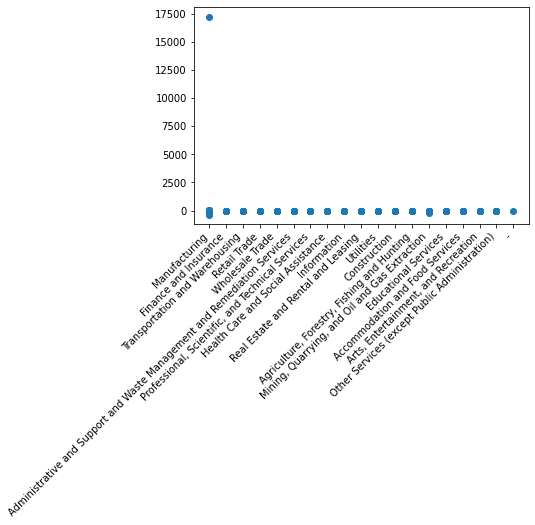

In [47]:
plt.scatter(mergedDF['Sector NAICS\nlevel 1'], mergedDF['operating_profit_margin'])
plt.xticks(rotation = 45, ha = "right")

**Ploteo general de todas las industrias con su Operating Profit Margin correspondiente**



*   **Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?**

* R: PODEMOS OBSERVAR QUE LAS PRIMERAS 3 FIRMAS O MARCAS QUE LIDERAN LA CABEZA DE LA LISTA ESTAN APPLE, MICROSOFT Y GOOGLE SIENDO TODAS ESTAS EMPRESAS LAS CUALES SUS PRINCIPALES ACTIVIDADES SE VASAN EN TECNOLOGIA. ASI MISMO, PODEMOS OBSERVAR QUE EL MARKET VALUE DE ESTAS EMPRESAS ES MAYOR QUE EL RESTO, DICIENDONOS QUE ESTAS EMPRESAS, POSIBLEMENTE TIENEN UN IMPACTO MUCHO MAS GRANDE EN EL MERCADO QUE EL RESTO DE LAS EMPRESAS LISTADAS. TIENE SENTIDO YA QUE A NIVEL MARKET VALUE, ESTAS EMPRESAS SON MUY IMPORTANTES, POR TEMA DE RELEVANCIA EN EL MERCADO EN GENERAL.

In [49]:
mergedDF['market_value'].nlargest(n=10)


8       2.212838e+09
2097    1.920840e+09
1379    1.435042e+09
200     1.080624e+09
3182    6.976698e+08
3263    4.818731e+08
1721    4.671001e+08
2001    4.363946e+08
2255    3.789750e+08
3300    3.743426e+08
Name: market_value, dtype: float64

In [50]:
mergedDF.loc[[8, 2097, 1379, 200, 3182, 3263, 1721, 2001, 2255, 3300],'firm']

8        AAPL
2097     MSFT
1379    GOOGL
200      AMZN
3182     TSLA
3263      UNH
1721      JNJ
2001     META
2255     NVDA
3300        V
Name: firm, dtype: object


*   **Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?**
* R: PARA ESTE CASO, PODEMOS VER QUE LAS EMPRESAS CON MAYOR BOOK VALUE, CAMBIAN EN CUANTO A LA ACTIVIDAD/INDUSTRIA A LA QUE SE DEDICAN, ESTO PORBABLEMENTE A QUE EL BOOK VALUE, YA QUE ESTE DEPENDE DE TODOS AQUELLOS COSTOS DE DEPRESIACION DE LA EMPRESA EN CUESTION, UN EJEMPLO CLARO DE ESTO, ES QUE EL PRIMER PUESTO LO OCUPA UN BANCO ESTADOUNIDENSE JP MORGAN CHASE.

In [51]:
mergedDF['book_value'].nlargest(n=10)

1727    286143000.0
374     269118000.0
1379    255419000.0
545     199626000.0
3509    184508000.0
3430    179793000.0
2097    166542000.0
861     154562000.0
3050    135307000.0
200     131402000.0
Name: book_value, dtype: float64

In [52]:
mergedDF.loc[[1727, 374, 1379, 545, 3509, 3430, 2097, 861, 3050, 200],'firm']

1727      JPM
374       BAC
1379    GOOGL
545         C
3509      XOM
3430      WFC
2097     MSFT
861       CVX
3050        T
200      AMZN
Name: firm, dtype: object

# 2.2.1.2 Considering the whole history of financial data for all firms:    

PARA LA REALIZACION DE ESTA PARTE, SE PIDIO CONTESTAR A DIFERENTES PREGUNTAS QUE NECESITABAN QUE DENTRO DE LA DATABSE EXISTIERA UNA DIVISION POR CUATRIMESTRE, POR LO QUE AHORA SE PROCEDERA A REALIZAR UNA COPIA DE ESTA Y PODER HACER UN COLAPSE DE LAS FILAS EN UNA FILA UNICA.

In [53]:
dataExtra = pd.read_csv('us2022q2a.csv')
df1Extra = pd.read_csv('us2022q2a.csv',names = dataExtra.columns)
df1Extra

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


SE REALIZA EL MERGE DEL DATASET BASANDONOS EN LOS INDICES SELECCIONADOS DE TICKER Y NAME, PARA DEPSUES HACER LA LIMPEIZA Y PODER REALIZAR EL MERGE DE AMBOS DATASETS

In [54]:
dataExtra = pd.read_csv('usfirms2022.csv')
df2Extra = pd.read_csv('usfirms2022.csv', names = dataExtra.columns)
df2Extra = df2Extra[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2Extra

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [55]:
dfExtra = pd.merge(df1Extra, df2Extra, left_on='firm', right_on="Ticker")
dfExtra = dfExtra.drop(columns=['Ticker'])
dfExtra = dfExtra.drop(dfExtra[dfExtra.firm.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.revenue.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.cogs.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.adjprice.isnull()].index)
dfExtra

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing




*   **How can you measure firm profitability that can be used to compare performance among firms of different sizes?**
*   **Select and justify at least 3 measures and show descriptive statistics**



EXISTEN DIFERENTES FORMULAS Y HERRAMIENTAS QUE NOS PODRIAN AYUDAR A MEDIR EL DESEMPEÑO DE LAS FIRMAS DE DIFERENTES TAMAÑOS, EN ESTE CASO SE USAN TRES FORMULAS: BOOK TO MARKET VALUE, SHORT FINANCIAL LEVERAGE Y LONG FINANCIAL LEVERAGE. A CONTINUACION SE EXPLICARA CADA UNO DE ESTAS MEDIDAS:

* BOOK TO MARKET VALUE: identifica valores infravalorados o sobrevalorados tomando el valor contable y dividiéndolo por el valor de mercado. La relación determina el valor de mercado de una empresa en relación con su valor real. SE USA,DBIDO A QUE NOS INDICA DE MANERA FACIL SI UNA EMPRESA SE PUEDE COMPRAR POR MENOS DEL VALOR DE SUS ACTIVOS, SI EL VALOR RESULTANTE SE ENCUENTRA AL REDEDOR DE 1.

* FINANCIAL LEVERAGE: resulta del uso de capital prestado como fuente de financiamiento cuando se invierte para expandir la base de activos de la empresa y generar rendimientos sobre el capital de riesgo Y SE DIVIDE EN CORTO PLAZO Y LARGO PLAZO, PODEMOS DECIR QUE ES UNA DEUDA A LARGO O CORTO PLAZO. 

In [56]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


In [58]:
#Agregmamos book to market ratio al dataset en donde estamos trabajando
#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))
dfExtra 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904


Tras haber calculado el book to market ratio, se procede a desglozar de manera genearl toda la informacion relacionada con esga variable, el describe para poder pbservar la mean, std y los percentiles, ademas se realizan graficas por firma y sector para poder vizualizar de mejor manera el comportamiento de la variable

In [59]:
dfExtra.groupby('firm')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.288494,0.120793,0.103716,0.217904,0.268915,0.343811,0.820484
AA,23.0,1.355959,0.971442,0.374854,0.809227,1.170410,1.495281,5.074055
AAIC,77.0,1.228171,0.552571,0.373104,0.941506,1.158641,1.481687,3.822178
AAL,35.0,-0.144885,0.382663,-1.022603,-0.514931,-0.001517,0.153169,0.263440
AAME,44.0,1.795551,0.629087,0.999613,1.323642,1.634052,2.083773,3.662740
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.286999,0.133422,0.148602,0.209419,0.268839,0.346420,0.461716
ZVO,44.0,0.720074,0.399884,0.199689,0.453955,0.653621,0.883630,2.098072
ZWS,41.0,0.300945,0.126009,0.028616,0.205552,0.293488,0.395857,0.503355


In [60]:
Sample1dDF = dfExtra[['firm', 'BookToMarketRatio']]
Sample1dDF

,firm,BookToMarketRatio
1,A,0.139169
2,A,0.221116
3,A,0.210718
4,A,0.394756
5,A,0.378058
...,...,...
323811,ZYNE,0.401883
323812,ZYNE,0.449880
323813,ZYNE,0.597384
323814,ZYNE,0.748904


Se procede a observar los histogramas de la variable book to market ratio en base a cada sector

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c16ad4ad0>,
      dtype=object)

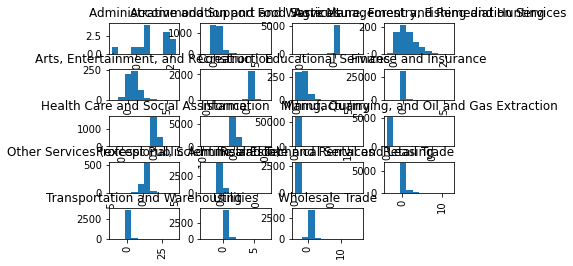

In [61]:
dfExtra.hist(column='BookToMarketRatio', by='Sector NAICS\nlevel 1')

In [62]:
#ShortFinancialLeverage = shortdebt / totalassets

dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830


Tras haber calculado el short finacial leverage, se procede a desglozar de manera genearl toda la informacion relacionada con esga variable, el describe para poder pbservar la mean, std y los percentiles, ademas se realizan graficas por firma y sector para poder vizualizar de mejor manera el comportamiento de la variable

In [63]:
dfExtra.groupby('firm')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.050791,0.055500,0.000000,0.021751,0.032594,0.059510,0.243941
AA,23.0,0.002537,0.010334,0.000063,0.000067,0.000075,0.000897,0.049896
AAIC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,35.0,0.041839,0.008872,0.027463,0.034723,0.039021,0.047526,0.060055
AAME,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.004057,0.001929,0.001888,0.002754,0.004131,0.005434,0.006076
ZVO,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZWS,41.0,0.007086,0.010558,0.000060,0.000678,0.004854,0.008571,0.062583


In [66]:
sample2dDF = dfExtra[['firm','ShortFinancialLeverage']]
sample2dDF

,firm,ShortFinancialLeverage
1,A,0.069936
2,A,0.067459
3,A,0.098516
4,A,0.060382
5,A,0.085132
...,...,...
323811,ZYNE,0.002100
323812,ZYNE,0.002307
323813,ZYNE,0.002576
323814,ZYNE,0.002830


In [69]:
#LongFinancialLeverage = longdebt / totalassests

dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936,0.000000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459,0.000000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516,0.000000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382,0.000000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100,0.004770
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307,0.004569
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576,0.004357
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830,0.003976


Tras haber calculado el long finacial leverage, se procede a desglozar de manera genearl toda la informacion relacionada con esga variable, el describe para poder pbservar la mean, std y los percentiles, ademas se realizan graficas por firma y sector para poder vizualizar de mejor manera el comportamiento de la variable

In [70]:
dfExtra.groupby('firm')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.193547,0.076053,0.000000,0.171441,0.206944,0.238204,0.381503
AA,23.0,0.116602,0.027216,0.079555,0.096540,0.114875,0.127486,0.178105
AAIC,78.0,0.044300,0.052730,0.000979,0.015593,0.018735,0.057950,0.206888
AAL,35.0,0.416729,0.063125,0.339314,0.360731,0.413919,0.441616,0.542572
AAME,45.0,0.107555,0.018407,0.083265,0.090759,0.104938,0.128502,0.150019
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.001865,0.002161,0.000008,0.000025,0.001647,0.003487,0.004155
ZVO,45.0,0.000712,0.004776,0.000000,0.000000,0.000000,0.000000,0.032038
ZWS,41.0,0.479835,0.102009,0.322382,0.385156,0.465212,0.574085,0.631874


In [71]:
sample3dDF = dfExtra[['firm', 'LongFinancialLeverage']]
sample3dDF

,firm,LongFinancialLeverage
1,A,0.000000
2,A,0.000000
3,A,0.000000
4,A,0.000000
5,A,0.000000
...,...,...
323811,ZYNE,0.004770
323812,ZYNE,0.004569
323813,ZYNE,0.004357
323814,ZYNE,0.003976


**Podemos observar histogramas de longfinancialleverage de cada sector **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c0b9cbfd0>,
      dtype=object)

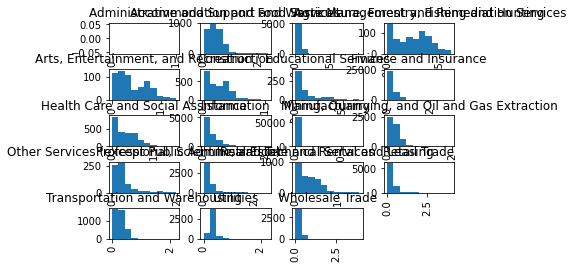

In [72]:
dfExtra.hist(column='LongFinancialLeverage', by='Sector NAICS\nlevel 1')



*   **Calculate and explain earnings per share deflated by price.**




In [73]:
dfExtra.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage'],
      dtype='object')

EL EPS un medidor utilizado en el análisis de balance para medir la rentabilidad por acción en un periodo determinado. Su cálculo se realiza dividiendo los beneficios de la empresa en el periodo seleccionado entre el número de acciones que constituye su capital social.

In [74]:
#EPS = netincome / #SharesOutstanding
#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome

dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))

dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

dfExtra['EPS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1         0.367036
2         0.342152
3         0.668323
4         0.337150
5         0.210032
            ...   
323811   -0.241205
323812   -0.256530
323813   -0.213867
323814   -0.200029
323815   -0.226007
Name: EPS, Length: 153245, dtype: float64

EN EL SIGUIENTE DIAGRAMA SE PUEDE OBSERVAR ALGO CURIOSO, EL CUAL PARECE SER UNA ANOMALIA EN LOS SECTORES, Y ES QUE PODEMOS VER QUE EL EPS, DE MANUFACTURING Y MINING TIENEN VALORES IRREGULARES, ES DECIR QUE A COMPARACION DE LOS OTROS SECTORES, ESTAS DOS TIENE UN VALOR NEGATIVO DE CASI -5E6 USD Y APROXIMADAMENTE 1E6 USD RESPECTIVAMENTE

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

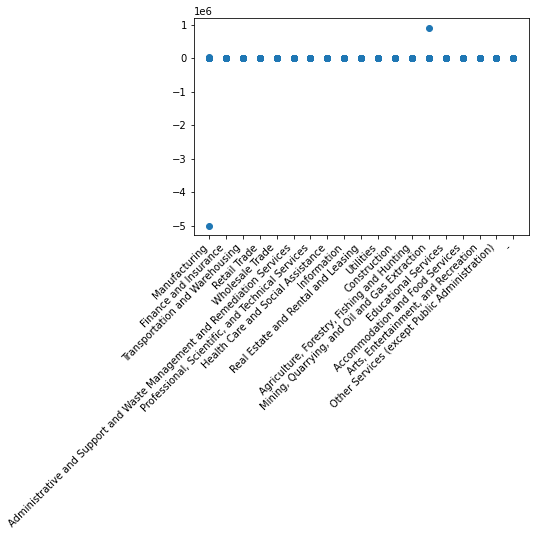

In [75]:
plt.scatter(dfExtra['Sector NAICS\nlevel 1'], dfExtra['EPS'])

plt.xticks(rotation = 45, ha = "right")

In [76]:
dfExtra.groupby('firm')['EPS'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.420154,0.882221,-3.272292,0.212429,0.440763,0.636054,6.500151
AA,23.0,0.107468,1.385143,-2.166711,-1.059465,0.230570,0.872640,2.976438
AAIC,77.0,0.148678,1.799500,-2.562073,-0.202300,0.192839,0.547008,13.361668
AAL,35.0,-0.058771,2.753022,-9.438679,0.145322,0.740485,1.294718,5.205247
AAME,44.0,0.055248,0.145597,-0.395677,0.011156,0.045079,0.099880,0.580378
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-0.260217,0.116521,-0.400173,-0.334244,-0.238637,-0.164610,-0.163422
ZVO,44.0,-0.044586,0.498383,-1.778515,-0.218795,-0.011200,0.214259,0.905355
ZWS,41.0,0.202404,0.292077,-0.596276,0.119546,0.243112,0.367039,0.785181


In [78]:
#se muestran las firmas que tuvo 'EPS', el más bajo y el cuatrimestre correspondiente en que sucedio esto
sorted_df = dfExtra.sort_values(by=['EPS'], ascending=False)
sorted_df.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
19973,APA,2022q2,3052000,0,1529000,0,-226000,0,394000,13839000,...,2,Apache Corp,"Mining, Quarrying, and Oil and Gas Extraction",3.490000e+01,2490000.0,71346.704871,0.009032,0.352988,903000.0,903000.000000
313754,WLK,2004q3,572031.0,487520.0,15055.0,516.0,-12884.0,10144.0,17595.0,1505866.0,...,3,Westlake Corp,Manufacturing,2.486450e+01,722938.0,29075.107080,0.000797,0.230558,28317.0,25396.412556
256495,SEB,2020q4,1990000.0,1760000.0,88000.0,0.0,124000.0,-3000.0,4000.0,6399000.0,...,4,Seaboard Corp,Wholesale Trade,3.518321e+06,3828000.0,1.088019,0.060634,0.160181,265000.0,228.294964
316703,WTM,2021q4,944800.0,0.0,313300.0,0.0,-7200.0,0.0,-3300.0,7000700.0,...,4,White Mountains Insurance Group Ltd,Finance and Insurance,3.059719e+06,3704700.0,1.210797,NaN,0.070036,627600.0,207.967998
316699,WTM,2020q4,520800.0,0.0,163500.0,0.0,14300.0,0.0,-117600.0,4831400.0,...,4,White Mountains Insurance Group Ltd,Finance and Insurance,3.104058e+06,3817900.0,1.229970,NaN,0.074285,489200.0,157.704147


# 2.2.2 About statistical modeling

**You have to select a group of firms according to their general industry classification:**

*   Manufacturing industries
*   Commercial industries (retail and wholesale)
*   Service industries
*   Financial services

**Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.**


*   **Do histograms for each factor/variables and interpret them**
*   **Do plots to visualize the possible relationship each factor might have with the dependent variable.**
*   **Show descriptive statistics of these factors**

In [79]:
dfExtra.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 

una vez que se me asigno el sector de commercial, se procede a realziar un filtrado de datos que corresponden a ese sector, para poder realizar un nuevo sample, pero con las furmas correspondientes

In [83]:
df_commercial = dfExtra[(dfExtra['Sector NAICS\nlevel 1']=='Retail Trade') | (dfExtra['Sector NAICS\nlevel 1']=='Wholesale Trade')].copy()
df_commercial

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
640,AAP,2002q3,788662,439000,278869,8248,4,16016,18170,2083203,...,3,"Advance Auto Parts, Inc",Retail Trade,1.880993e+06,456191.0,0.242527,0.005541,0.365411,28363.0,0.795252
641,AAP,2002q4,702417,389607,269884,9090,-3203,15485,6529,1965225,...,4,"Advance Auto Parts, Inc",Retail Trade,1.745366e+06,468356.0,0.268343,0.005882,0.368829,8619.0,0.241479
644,AAP,2003q3,849323,460579,306868,2522,13,5935,28268,2011249,...,3,"Advance Auto Parts, Inc",Retail Trade,2.601886e+06,597287.0,0.229559,0.012049,0.226769,45164.0,1.230695
645,AAP,2003q4,771668,404990,308684,1624,-410,4892,19796,1983071,...,4,"Advance Auto Parts, Inc",Retail Trade,3.004391e+06,631244.0,0.210107,0.026880,0.213195,31272.0,0.847274
648,AAP,2004q3,908412,486110,331055,0,-152,4531,33329,2125947,...,3,"Advance Auto Parts, Inc",Retail Trade,2.575440e+06,759748.0,0.294997,0.013421,0.149569,53235.0,0.711057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323271,ZUMZ,2021q2,279069.0,175900.0,68889.0,0.0,254.0,-975.0,9124.0,1017804.0,...,2,Zumiez Inc,Retail Trade,1.263012e+06,581781.0,0.460630,0.066253,0.234380,26385.0,1.023427
323272,ZUMZ,2021q3,268666.0,163701.0,73011.0,0.0,-151.0,-965.0,8770.0,1030742.0,...,3,Zumiez Inc,Retail Trade,1.000538e+06,594296.0,0.593977,0.063880,0.216391,23998.0,0.953648
323273,ZUMZ,2021q4,289455.0,174791.0,74822.0,0.0,468.0,-893.0,10501.0,978189.0,...,4,Zumiez Inc,Retail Trade,1.102706e+06,531742.0,0.482215,0.065825,0.225441,30702.0,1.336157
323274,ZUMZ,2022q1,346677.0,212744.0,82198.0,0.0,-1462.0,-759.0,12828.0,862012.0,...,1,Zumiez Inc,Retail Trade,7.612303e+05,468318.0,0.615212,0.073754,0.237014,38204.0,1.917652


In [84]:
df_commercial.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
Retail Trade       152
Wholesale Trade     79
Name: firm, dtype: int64

In [85]:
df_commercial.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage',
       'netincome', 'EPS'],
      dtype='object')

In [86]:
df_commercial['q']

640       2002q3
641       2002q4
644       2003q3
645       2003q4
648       2004q3
           ...  
323271    2021q2
323272    2021q3
323273    2021q4
323274    2022q1
323275    2022q2
Name: q, Length: 11370, dtype: object

In [87]:
df_commercial.set_index(['firm','q'], inplace=True)

In [89]:
#En esta parte se procede a realizar el multiindex del dataset para poder realizar el shift correspondiente
df_commercial

revenue      cogs     sgae otheropexp extraincome finexp  \
firm q                                                                   
AAP  2002q3    788662    439000   278869       8248           4  16016   
     2002q4    702417    389607   269884       9090       -3203  15485   
     2003q3    849323    460579   306868       2522          13   5935   
     2003q4    771668    404990   308684       1624        -410   4892   
     2004q3    908412    486110   331055          0        -152   4531   
...               ...       ...      ...        ...         ...    ...   
ZUMZ 2021q2  279069.0  175900.0  68889.0        0.0       254.0 -975.0   
     2021q3  268666.0  163701.0  73011.0        0.0      -151.0 -965.0   
     2021q4  289455.0  174791.0  74822.0        0.0       468.0 -893.0   
     2022q1  346677.0  212744.0  82198.0        0.0     -1462.0 -759.0   
     2022q2  220686.0  148312.0  71877.0        0.0       172.0 -492.0   

            incometax totalassets totalliabilities shortdebt  ... cto  \
firm q                                                        ...       
AAP  2002q3     18170     2083203          1627012     11542  ...   3   
     2002q4      6529     1965225          1496869     11559  ...   4   
     2003q3     28268     2011249          1413962     24233  ...   3   
     2003q4     19796     1983071          1351827     53305  ...   4   
     2004q3     33329     2125947          1366199     28533  ...   3   
...               ...         ...              ...       ...  ...  ..   
ZUMZ 2021q2    9124.0   1017804.0         436023.0   67433.0  ...   2   
     2021q3    8770.0   1030742.0         436446.0   65844.0  ...   3   
     2021q4   10501.0    978189.0         446447.0   64389.0  ...   4   
     2022q1   12828.0    862012.0         393694.0   63577.0  ...   1   
     2022q2    1558.0    768114.0         391217.0   69327.0  ...   2   

                                Name Sector NAICS\nlevel 1  market_value  \
firm q                                                                     
AAP  2002q3  Advance Auto Parts, Inc          Retail Trade  1.880993e+06   
     2002q4  Advance Auto Parts, Inc          Retail Trade  1.745366e+06   
     2003q3  Advance Auto Parts, Inc          Retail Trade  2.601886e+06   
     2003q4  Advance Auto Parts, Inc          Retail Trade  3.004391e+06   
     2004q3  Advance Auto Parts, Inc          Retail Trade  2.575440e+06   
...                              ...                   ...           ...   
ZUMZ 2021q2               Zumiez Inc          Retail Trade  1.263012e+06   
     2021q3               Zumiez Inc          Retail Trade  1.000538e+06   
     2021q4               Zumiez Inc          Retail Trade  1.102706e+06   
     2022q1               Zumiez Inc          Retail Trade  7.612303e+05   
     2022q2               Zumiez Inc          Retail Trade  5.059484e+05   

            book_value BookToMarketRatio ShortFinancialLeverage  \
firm q                                                            
AAP  2002q3   456191.0          0.242527               0.005541   
     2002q4   468356.0          0.268343               0.005882   
     2003q3   597287.0          0.229559               0.012049   
     2003q4   631244.0          0.210107               0.026880   
     2004q3   759748.0          0.294997               0.013421   
...                ...               ...                    ...   
ZUMZ 2021q2   581781.0          0.460630               0.066253   
     2021q3   594296.0          0.593977               0.063880   
     2021q4   531742.0          0.482215               0.065825   
     2022q1   468318.0          0.615212               0.073754   
     2022q2   376897.0          0.744932               0.090256   

            LongFinancialLeverage netincome       EPS  
firm q                                                 
AAP  2002q3              0.365411   28363.0  0.795252  
     2002q4              0.368829    8619.0  0.241479  
     2003q3     

In [90]:
#EPSP = EPS \ NetIncome('adjprice')
# se hizo esta corrección
df_commercial = df_commercial.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )

df_commercial

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


revenue      cogs     sgae otheropexp extraincome finexp  \
firm q                                                                   
AAP  2002q3    788662    439000   278869       8248           4  16016   
     2002q4    702417    389607   269884       9090       -3203  15485   
     2003q3    849323    460579   306868       2522          13   5935   
     2003q4    771668    404990   308684       1624        -410   4892   
     2004q3    908412    486110   331055          0        -152   4531   
...               ...       ...      ...        ...         ...    ...   
ZUMZ 2021q2  279069.0  175900.0  68889.0        0.0       254.0 -975.0   
     2021q3  268666.0  163701.0  73011.0        0.0      -151.0 -965.0   
     2021q4  289455.0  174791.0  74822.0        0.0       468.0 -893.0   
     2022q1  346677.0  212744.0  82198.0        0.0     -1462.0 -759.0   
     2022q2  220686.0  148312.0  71877.0        0.0       172.0 -492.0   

            incometax totalassets totalliabilities shortdebt  ...  \
firm q                                                        ...   
AAP  2002q3     18170     2083203          1627012     11542  ...   
     2002q4      6529     1965225          1496869     11559  ...   
     2003q3     28268     2011249          1413962     24233  ...   
     2003q4     19796     1983071          1351827     53305  ...   
     2004q3     33329     2125947          1366199     28533  ...   
...               ...         ...              ...       ...  ...   
ZUMZ 2021q2    9124.0   1017804.0         436023.0   67433.0  ...   
     2021q3    8770.0   1030742.0         436446.0   65844.0  ...   
     2021q4   10501.0    978189.0         446447.0   64389.0  ...   
     2022q1   12828.0    862012.0         393694.0   63577.0  ...   
     2022q2    1558.0    768114.0         391217.0   69327.0  ...   

                                Name Sector NAICS\nlevel 1  market_value  \
firm q                                                                     
AAP  2002q3  Advance Auto Parts, Inc          Retail Trade  1.880993e+06   
     2002q4  Advance Auto Parts, Inc          Retail Trade  1.745366e+06   
     2003q3  Advance Auto Parts, Inc          Retail Trade  2.601886e+06   
     2003q4  Advance Auto Parts, Inc          Retail Trade  3.004391e+06   
     2004q3  Advance Auto Parts, Inc          Retail Trade  2.575440e+06   
...                              ...                   ...           ...   
ZUMZ 2021q2               Zumiez Inc          Retail Trade  1.263012e+06   
     2021q3               Zumiez Inc          Retail Trade  1.000538e+06   
     2021q4               Zumiez Inc          Retail Trade  1.102706e+06   
     2022q1               Zumiez Inc          Retail Trade  7.612303e+05   
     2022q2               Zumiez Inc          Retail Trade  5.059484e+05   

            book_value BookToMarketRatio ShortFinancialLeverage  \
firm q                                                            
AAP  2002q3   456191.0          0.242527               0.005541   
     2002q4   468356.0          0.268343               0.005882   
     2003q3   597287.0          0.229559               0.012049   
     2003q4   631244.0          0.210107               0.026880   
     2004q3   759748.0          0.294997               0.013421   
...                ...               ...                    ...   
ZUMZ 2021q2   581781.0          0.460630               0.066253   
     2021q3   594296.0          0.593977               0.063880   
     2021q4   531742.0          0.482215               0.065825   
     2022q1   468318.0          0.615212               0.073754   
     2022q2   376897.0          0.744932               0.090256   

            LongFinancialLeverage netincome       EPS      EPSP  
firm q                                                           
AAP  2002q3              0.365411   28363.0  0.795252  0.015079  
     2002q4              0.368829    8619.0  0.241479  0.004938  
     2003q3              0.2

EN ESTE PRIMER GRAFICA PODEMOS INTERPRETAR QUE LOS VALORES DE EPSP ESTAN DISTRIBUIIDAS DE TAL MANERA QUE NO TIENEN AL CENTRO, ES DECIR AL VALOR CERO, POR LO TANTO PODEMOS DECIR QUE EL PICO DE LOS VALORES MÁS ALTOS ES ENTRE 0 A 0.05, 
PARA LA REALIZACION DE LOS HITOGRAMAS, EL LIMITE PERCENTIL DE LOS DATOS DENTRO DE UN RANGO DE 0.025 A 0.975 SE CONFIGURA PARA EVITAR DATOS ATIPICOS FUERA DE RANGO, Y ASI LOGRAR UNA MEJOR INTERPRETACION DE LOS MISMOS



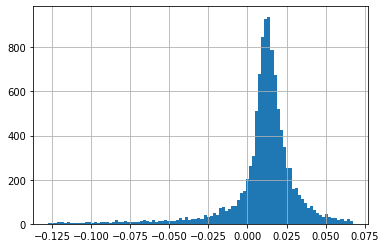

In [93]:
df_commercial[(df_commercial['EPSP'] < df_commercial['EPSP'].quantile(.975)) & (df_commercial['EPSP'] > df_commercial['EPSP'].quantile(.025))]['EPSP'].hist(bins=100)

EN LA SIGUIENTE GRAFICA PODEMOS OBSERVAR QUE LA DISPERSION DE LOS DATOS TIENDE A ESTAR ENTRE 0 Y UN POCO MENOS DE 1, PODEMOS DECIR QUE ESTO ES RAZONABLE, YA QUE COMO SE MENCIONO ANTERIORMENTE, LO NORMAL ES QUE LA MAYORIA DE LAS FIRMAS TENGA UN VALOR DE BOOK TO MARKET RATIO DE 0 A 1

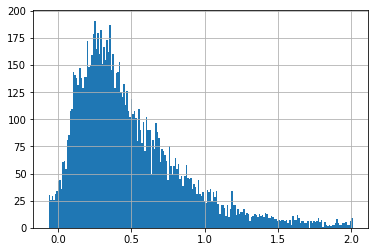

In [95]:
df_commercial[(df_commercial['BookToMarketRatio'] < df_commercial['BookToMarketRatio'].quantile(.975)) & (df_commercial['BookToMarketRatio'] > df_commercial['BookToMarketRatio'].quantile(.025))]['BookToMarketRatio'].hist(bins=200)

EN ESTE CASO PODEMOS OBSERVAR QUE LA DISTRIBUCION DE EMPRESAS SE ENCUENTRA ENTRE 0 Y 1, POR LO QUE PODEMOS AGREGAR QUE  POR LO MENOS 450 FIRMAS TIENE  UN SHORT FINANCE LEVERAGE BAJO.

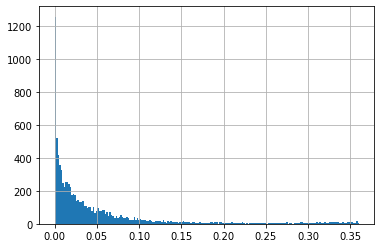

In [96]:
df_commercial[(df_commercial['ShortFinancialLeverage'] < df_commercial['ShortFinancialLeverage'].quantile(.975)) & (df_commercial['ShortFinancialLeverage'] > df_commercial['ShortFinancialLeverage'].quantile(.025))]['ShortFinancialLeverage'].hist(bins=200)

EN ESTA GRAFICA PODEMOS VER QUE LA MAYORIA DE LAS EMPRESAS TIENEN UN FINANCIAL LEVERAGE EN UN LARGO PERIODO, LO QUE HACE SENTIDO, PARA EMPRESAS GRANDES O MEDIANAS, PUES ES LOGICO PEDIR PRESTAMOS PARA PODER COMRAR ACTIVOS, ALGO CURIOSO QUE PODEMOS OBSERVAR AQUI, ES QUE LA GRAFICA TIENDE A COMPORTARSE DE MANERA ASIMETRICA.

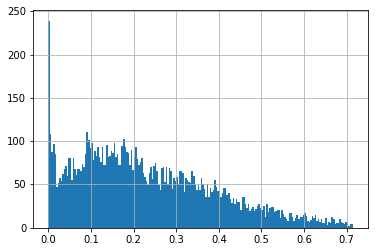

In [97]:
df_commercial[(df_commercial['LongFinancialLeverage'] < df_commercial['LongFinancialLeverage'].quantile(.975)) & (df_commercial['LongFinancialLeverage'] > df_commercial['LongFinancialLeverage'].quantile(.025))]['LongFinancialLeverage'].hist(bins=200)

In [99]:
df_commercial['R'] = np.log(df_commercial['adjprice'].astype(np.float)) - np.log(df_commercial.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_commercial['R']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


firm  q     
AAP   2002q3         NaN
      2002q4         NaN
      2003q3         NaN
      2003q4         NaN
      2004q3    0.265830
                  ...   
ZUMZ  2021q2    0.581803
      2021q3    0.357106
      2021q4    0.266038
      2022q1   -0.115775
      2022q2   -0.633520
Name: R, Length: 11370, dtype: float64

LA VARIALBE DEPENDIENTE SON LOS RETORNOS ANUALES (CONTINUOS COMPUESTOS) 1 TRIMESTRE EN EL FUTURO.
PARA INTERPRETAR PRIMERO SE TIENEN QUE CALCULAR LOS RETORNOS CONTINUOS COMPUESTOS ANUALES PARA POSTERIORMENTE GENERAR UNA VARIABLE LA CUAL ES EL FUTURO DE LA ANTERIOR, ES DECIR, 1 TRIMESTRE ADELANTE.

In [100]:
df_commercial['RNQ'] = df_commercial.groupby(['firm'])['R'].shift(-1)

EN LOS SIGUIENTES GRAFOCAS PORDREMOS OBSERVAR LA RELACION QUE EXISTE ENTRE LA VARIABLE DEPENDIENTE RNQ Y NUESTROS FACTORES INDEPENDEINTES, ES DEICR 'EPSP', BOOK TO MARKET RATIO, SHORT FINANCIALLEVARAGE Y LONGFINANCIALLEVERAGE.
LOS PUNTOS AZULES SON LA DISTRIBUCION DE LOS DISTINTOS VALORES DE LOS FACTORES Y LA LINEA ROJA REPRESENTA LA PENDIENTE.

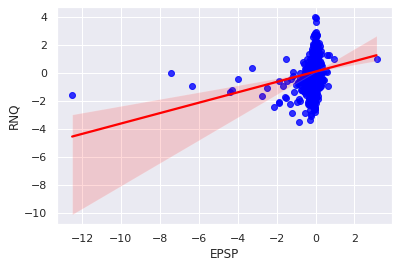

In [101]:
import seaborn as sns; sns.set_theme(color_codes=True)

x = sns.regplot(x="EPSP", y="RNQ", data=df_commercial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})


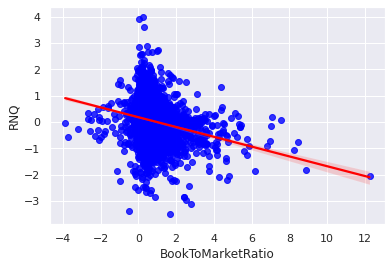

In [102]:
#df_Services.plot(kind = 'scatter', x = 'BookToMarketRatio', y = 'RNQ')

#plt.show() 

x = sns.regplot(x="BookToMarketRatio", y="RNQ", data=df_commercial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

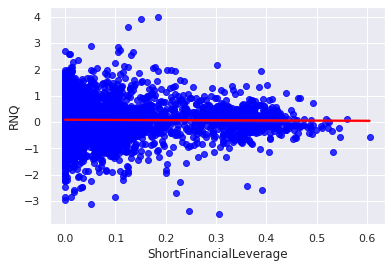

In [103]:
#df_Services.plot(kind = 'scatter', x = 'ShortFinancialLeverage', y = 'RNQ')

#plt.show()

x = sns.regplot(x="ShortFinancialLeverage", y="RNQ", data=df_commercial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

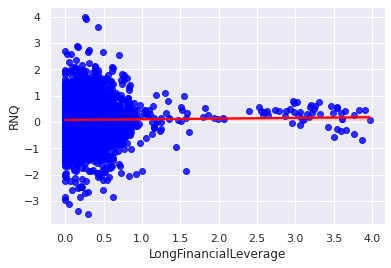

In [104]:
x = sns.regplot(x="LongFinancialLeverage", y="RNQ", data=df_commercial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

PARA PODER INTERPRETAR LOS DIAGRAMAS, TENEMOS QUE TOMAR EN CUENTA QUE LOS EJES X SON LAS VARIABLES INDEPENDIENTES Y EL RNQ ES LA DEPENDIENTE, EN BASE A ESO, ESTAMOS CALCULANDO LA REGRESION, CON LO CUAL PODREMOS REALIZAR PREDICCIONES.

EN ESTA PARTE SE PROCEDIO A REALIZAR UN RESUMEN DE LOS DATOS DE CADA FACTOR, DE MANERA QUE SE REALIZA EN BASE A LOS SECTORES, YA QUE COMO SE MENCIONO ANTERIORMENTE, REALIZARLO CON CADA FIRMA ESTO SERIAN DEMASIADOS DATOS.
EL METODO DE DESCRIBE() DEVUELVE UNA DESCPCION DE LOS DATOS DEL DATA FRAME, SI EL DATAFRAME CONTIENE DATOS NUMERICOS ENTONCES SE OBTENDRAN LOS SIGUIENTES RESULTADOS:

* COUNT: EL NUMERO DE VALORES VACIOS
* MEAN: EL VALOR DEL PROMEDIO
* STD: LA DESCIACION ENTANDAR
* MIN: EL VALOR MINIMO
* 25&: el percentil 25%
* 50%: ...
* 75%: ...
* max: EL VALOR MAXIMO

EN LAS DESCRIPTIVAS DEL EPSP VEMOS QUE TENEMOS VALORES NEGATIVOS Y VALORES POSITIVOS, LLEGANDO HASTA 14.75 USD Y LELGANDO A SER DE CASO -12.50 USD, VEMOS CLARAMENTE QUE LA MEAN DEL RETAIL TRADE ES MENOR QUE EL DE WHOLESALE

In [105]:
df_commercial.groupby('Sector NAICS\nlevel 1')['EPSP'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Retail Trade,7370.0,-0.002378,0.225835,-12.504518,0.005896,0.01253,0.020094,2.470239
Wholesale Trade,3934.0,0.003860,0.128649,-4.384181,0.005385,0.01342,0.020576,3.134703


PARA EL RESTO DE LOS DESCRIPTIVOS, PODEMOS NOTAR QUE OBTENEMOS RESULTADOS EN BASE A RATAIL TRADE Y WHOLESALE TRADE, DANDONOS LAS ESTADISTICAS DESCPRIPTIVAS DE CADA VARIABLE.

In [106]:
df_commercial.groupby('Sector NAICS\nlevel 1')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Retail Trade,7370.0,0.487240,0.622228,-3.878779,0.19109,0.354392,0.614928,12.254784
Wholesale Trade,3934.0,0.644021,0.668612,-3.729416,0.30156,0.487906,0.840946,15.501567


In [107]:
df_commercial.groupby('Sector NAICS\nlevel 1')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Retail Trade,7403.0,0.056778,0.102029,0.0,0.000021,0.012987,0.057576,0.615033
Wholesale Trade,3966.0,0.028510,0.046579,0.0,0.001841,0.013174,0.034388,0.605165


In [108]:
df_commercial.groupby('Sector NAICS\nlevel 1')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Retail Trade,7404.0,0.222095,0.221670,0.0,0.037405,0.176545,0.341368,3.968653
Wholesale Trade,3966.0,0.237952,0.383935,0.0,0.073985,0.173086,0.302819,3.904789


**Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model**

*   **Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size**
*   **For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model**
*   **You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test**

In [ ]:
!pip install statsmodels
import statsmodels.api as sm

A CONTUNICAION PODEMOS OBSERVAR CUANTAS EMPRESAS DEPENDIENDO DEL MARKET VALUE HAY EN NUESTRO SET DE DATOS, PODEMOS OBSERVAR QUE TENEMOS UNA DISTRIBUCION MUY SIMILAR, YA QUE LAS 3 DIVISIONES DAN COMO RESULTADO CIFRAS SIMILARES

In [110]:
df_commercial = df_commercial.sort_values(by=['q','market_value'], ascending = True)
df_commercial['size'] = df_commercial.groupby(['q'])['market_value'].transform(lambda x: pd.qcut(x,3,labels = ['small', 'medium', 'big']))
df_commercial[['size']].value_counts(sort = True)

size  
small     3797
big       3765
medium    3742
dtype: int64

In [111]:
x = ['size','EPSP']

model2 = sm.OLS((df_commercial['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_commercial[x], drop_first=True)), missing = 'drop').fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     28.50
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           2.40e-18
Time:                        19:25:38   Log-Likelihood:                -7354.0
No. Observations:               10439   AIC:                         1.472e+04
Df Residuals:                   10435   BIC:                         1.475e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0315      0.008      3.756      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
x = ['size','BookToMarketRatio']

model3 = sm.OLS((df_commercial['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_commercial[x], drop_first=True)), missing = 'drop').fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     50.64
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.74e-32
Time:                        19:26:09   Log-Likelihood:                -7321.2
No. Observations:               10439   AIC:                         1.465e+04
Df Residuals:                   10435   BIC:                         1.468e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0884      0.01

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
x = ['size','ShortFinancialLeverage']

model4 = sm.OLS((df_commercial['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_commercial[x], drop_first=True)), missing = 'drop').fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     23.51
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.69e-15
Time:                        19:26:20   Log-Likelihood:                -7389.4
No. Observations:               10452   AIC:                         1.479e+04
Df Residuals:                   10448   BIC:                         1.482e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [114]:
x = ['size','LongFinancialLeverage']

model5 = sm.OLS((df_commercial['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_commercial[x], drop_first=True)), missing = 'drop').fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     23.51
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.70e-15
Time:                        19:26:28   Log-Likelihood:                -7389.9
No. Observations:               10453   AIC:                         1.479e+04
Df Residuals:                   10449   BIC:                         1.482e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


EN LA SIGUIENTE GRAFICA, PODEMOS OBSERVAR LA CORRELACION QUE TIENEN LAS VARIABLES DEL MODELO. COMO PODEMOS DARNOS CUENTA, Y LOGICAMENTE HABLANDO, NO ES POSIBLE QUE LAS VARIABLES TENGAN UNA BUENA CORRELACION ENTRE TODAS, ASI QUE ESTA GRAFICA NOS PERMITE VER AQUELLAS VARIBALES QUE TIENEN CIERTA CORRELACION Y NOS LO HACE SABER SUBRRAYANDOLA DE DISTINTO COLOR, EN ESTE CASO COLOR NARANJA, ES ASI COMO PODREMOS REALMENTE GUIARNOS CON QUE VARIABLES PODEMOS APLICAR UNA REGRESION PARA PODER PREDECIR.


In [115]:
copy = df_commercial
copy = copy.dropna()
corr = copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ
market_value,1.000000,0.694156,-0.104922,-0.045421,0.021257,0.681285,0.067261,0.010887,0.038978,0.028914
book_value,0.694156,1.000000,-0.054850,-0.041912,-0.034190,0.754799,0.041621,0.022195,0.005331,0.004881
BookToMarketRatio,-0.104922,-0.054850,1.000000,0.096706,-0.189407,-0.111983,-0.026025,-0.158090,-0.347689,-0.238450
ShortFinancialLeverage,-0.045421,-0.041912,0.096706,1.000000,0.043320,-0.040769,-0.001280,-0.031647,-0.015817,-0.010166
LongFinancialLeverage,0.021257,-0.034190,-0.189407,0.043320,1.000000,0.020031,0.001314,-0.016442,0.008954,0.016958
netincome,0.681285,0.754799,-0.111983,-0.040769,0.020031,1.000000,0.120322,0.090742,0.052952,0.041952
EPS,0.067261,0.041621,-0.026025,-0.001280,0.001314,0.120322,1.000000,0.086243,0.057074,0.051255
EPSP,0.010887,0.022195,-0.158090,-0.031647,-0.016442,0.090742,0.086243,1.000000,0.207730,0.151677
R,0.038978,0.005331,-0.347689,-0.015817,0.008954,0.052952,0.057074,0.207730,1.000000,0.715163
RNQ,0.028914,0.004881,-0.238450,-0.010166,0.016958,0.041952,0.051255,0.151677,0.715163,1.000000


In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

**resultado VIF de varaibles**

In [118]:
calculate_vif(df=copy, features=['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage'])

,VIF,Tolerance
EPSP,1.028178,0.972594
BookToMarketRatio,1.077449,0.928118
ShortFinancialLeverage,1.013661,0.986523
LongFinancialLeverage,1.043647,0.958178


In [119]:
x = ['size','EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']

modelF = sm.OLS((df_commercial['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_commercial[x], drop_first=True)), missing = 'drop').fit()

print(modelF.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     27.13
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           2.81e-32
Time:                        19:27:28   Log-Likelihood:                -7315.3
No. Observations:               10438   AIC:                         1.464e+04
Df Residuals:                   10431   BIC:                         1.470e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Interpret your model**



*   **Interpret the results of each coefficient (beta and their statistical significance)**
*   **Interpret the R-squared of the model**


*   **Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.**

INTERPRETAICON DEL MODELO:
PARA EMPEZAR, EL VALOR DE P, ES IMPORTANTE MENCIONARLO, YA QUE DE AQUI SE OBTIENE LA MAYORIA DE LAS VARIABLES, POSIBLEMENTE PODRIAMOS DESTACAR LONGFINANCIALLEVERAGE, DONDE EL VALOR LLEGA A CASI 0.130 Y EPSP, EL CUAL LLEGA A CASI 0.005, SIN EMBARGO ESTOS NO RESULTAN SER VALORES LO SUFICIENTEMENTE ALTOS PARA LLEGAR A SER DE IMPORTANCIA, SIENDO QUE CON ESTOS SE PUEDE DECIR QUE EL MODELO RECHAZA ALGUNA HIPOTEISS NULA, Y LAS VARIABLES SERIAN SIGNIFICATIVAS.

HABLANDO DE LOS COEFICIENTES DE CADA VARIABLE, PODEMOS VERLAS COMO PENDIENTES, POR LO QUE PODEMOS VER ALGO INTERESANTE, Y ES QUE BOOK FINANCIAL RATIO Y EL LONG FINANCIAL LAVERAGE SON NEGATIVOS, AUNQUE POR LA DEFINICION DE ESTOS, PODEMOS DECIR QUE ERA ALGO ESPERADO.

PARA ANALIZAR EL STANDARD ERROR, TAMBIEN CONOCIDO COMO DEVIACION ESTANDAR, ESTE MUESTRA LA VARIABILIDAD DE MUESTREO DE LOS PARAMETROS, SIENDO ESTE EL CASO DE NUESTRO MODELO, YA QUE ES CONSIDERABLEMENTE BAJO, PO LO QUE LOS DATOS OBTENIDOS ESTAN CERCANOS AL SAMPLE QUE SE USO PARA CADA UNA DE LAS VARIABLES.

HABLANDO DEL VALOR DE T, ESTE NOS INDICA LA SIGNIFICATE DE LA ESTADISTICA DE LOS DITINTOS COEFICIENTES DONDE PORDREMOS VER UN VALOR MAXIMO EN SIZE_BIG DE 4.69 YUN VALOR MINIMO CON BOOK TO MARKET RATIO

R SQUARED ES EL COEFICIENTE DE DETERMINACION QUE NOS DICE QUE TANTA VARIACION PORCENTUAL DE LA VARIABLE INDEPENDIENTE PUEDE SER EXPLICADA A TRAVES DE LA VARIABLE INDEPENDEITE, ENE ESTE CASO, PODEMOS OBSERVAR QUE ES CONSIDERABLEMENTE BAJA DE 0.015, SIENDO 1 EL LIMITE DE R SQUARED, CONCLUYENDO QUE EL MODELO NO ES MUY FIABLE, QUIZAS SE DEBA A LA LIMPIEZA DE LOS MISMOS DATASETS, EN DONDE SE QUITAN VARIOS DATOS O SIMPLEMENTE SE DEJAN COMO INCOMPLETOS.


In [120]:
x = ['size','EPSP','BookToMarketRatio','LongFinancialLeverage']

model1 = sm.OLS((df_commercial['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_commercial[x], drop_first=True)), missing = 'drop').fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     32.55
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           4.67e-33
Time:                        19:27:43   Log-Likelihood:                -7315.8
No. Observations:               10439   AIC:                         1.464e+04
Df Residuals:                   10433   BIC:                         1.469e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
